## Name: Bhavesh Kewalramani
## Roll No.: A-25
## Section: A
## Semester: VII
## Shift: I
## Batch: A1

# PART(B): Perform Market basket analysis using the apriori algorithm on Market_Basket_Optimisation.csv dataset.

### Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

### 1. Import the dataset using pandas.

In [2]:
market_basket = pd.read_csv('Market_Basket_Optimisation.csv')
market_basket1 = market_basket.copy()
market_basket2 = market_basket.copy()

### 2. State the number of rows and columns in the dataset. What do rows and columns represent about the dataset?

In [3]:
print("Number of rows : ",market_basket.shape[0])
print("Number of Columns : ",market_basket.shape[1])

Number of rows :  7500
Number of Columns :  20


Each row represents a sample of data, Each column contains a different variable that describes the samples (rows).

### 3. Replace all the nan values with &#39; &#39; [blank]

In [4]:
market_basket = market_basket.fillna('')

### 4. Find the total number of unique products available.

In [5]:
market_basket.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,,,,,,,,,,,,,,,,,
1,chutney,,,,,,,,,,,,,,,,,,,
2,turkey,avocado,,,,,,,,,,,,,,,,,,
3,mineral water,milk,energy bar,whole wheat rice,green tea,,,,,,,,,,,,,,,
4,low fat yogurt,,,,,,,,,,,,,,,,,,,


In [6]:
cols = market_basket.columns.unique()
uniq = []
for i in cols:
    temp = list(set(list(market_basket[i].unique())))
    for j in temp:
        if j not in uniq and j!='':
            uniq.append(j)
# print(uniq)
print("Total number of unique values present in dataset : ",len(uniq))
count = market_basket.nunique()
print("Total number of unique values present in each column in a dataset: ")
print(count)
# count = market_basket.nunique(dropna=False)
# print("Total number of unique values present in each column in a dataset (including NAN): ")
# print(count)

Total number of unique values present in dataset :  120
Total number of unique values present in each column in a dataset: 
shrimp               115
almonds              118
avocado              116
vegetables mix       115
green grapes         111
whole weat flour     107
yams                 103
cottage cheese        99
energy drink          89
tomato juice          81
low fat yogurt        67
green tea             51
honey                 43
salad                 29
mineral water         19
salmon                 8
antioxydant juice      3
frozen smoothie        3
spinach                3
olive oil              1
dtype: int64


### 5. Represent using appropriate visualization, the unique products vs the number of times they are purchased. [Restrict to top 10 items].

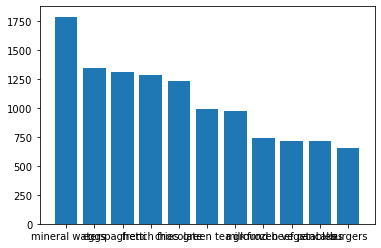

In [7]:
top_10 = market_basket1.stack().value_counts(dropna=True)[:11]
d=dict(top_10)
X = list(d.keys())
Y = list(d.values())
plt.bar(X,Y)
plt.show()

### 6. Convert the data frame into a list of a list where each inner list represents a transaction. For example, all items of row 1 will be present in the first list inside the outer list.

In [8]:
listOfList = market_basket.to_numpy().tolist()
for i in range(len(listOfList)):
    listOfList[i] = [ele for ele in listOfList[i] if ele != '']
print(listOfList)

[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['burgers', 'grated chee

### 7. Transform the dataset for the Aprori algorithm: Encode the data such that it contains True and False / 0 and 1. The columns are the item names and rows will contain if that item is present or not.

In [9]:
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
transactions = []
for i in range(0, 7500):
    transactions.append([str(market_basket2.values[i,j]) for j in range(0, 20)])
print(transactions)

[['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['chutney', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['turkey', 'avocado', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['low fat yogurt', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['whole wheat pasta', 'french fries', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan'], ['soup', 'light cream', 'shallot', 'nan', 'nan', 'nan'

In [10]:
from mlxtend.preprocessing import TransactionEncoder

t = []
for i in range(0, len(market_basket2)):
    t.append([str(market_basket2.values[i,j]) for j in range(0, len(market_basket2.columns))])

encoder = TransactionEncoder().fit(t)

onehot = encoder.transform(t)

onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

onehot.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 8. Find the frequent item set by applying the Aprori algorithm. [use min support as min_support=0.01]. Draw a conclusion based on the output received.

In [11]:
frequent_itemsets = apriori(onehot, min_support = 0.01, use_colnames = True)

frequent_itemsets.head()

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)


In [12]:
frequent_itemsets.tail()

,support,itemsets
254,0.011067,"(ground beef, milk, mineral water)"
255,0.017067,"(ground beef, spaghetti, mineral water)"
256,0.015733,"(milk, spaghetti, mineral water)"
257,0.010267,"(olive oil, spaghetti, mineral water)"
258,0.011467,"(pancakes, spaghetti, mineral water)"


we have generated the list of association rules between the items which have minimum support greater than or equal to 0.01. Now these can be used to generate the association rules. The output suggests us that which items can be placed together to get the maximum profit

### 9. Represent using appropriate visualization, a few groups of item sets with their meaning 

In [13]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01).sort_values('confidence',ascending=False)

In [14]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
370,"(eggs, ground beef)",(mineral water),0.020000,0.238267,0.010133,0.506667,2.126469,0.005368,1.544054
406,"(milk, ground beef)",(mineral water),0.022000,0.238267,0.011067,0.503030,2.111207,0.005825,1.532756
346,"(chocolate, ground beef)",(mineral water),0.023067,0.238267,0.010933,0.473988,1.989319,0.005437,1.448130
394,"(frozen vegetables, milk)",(mineral water),0.023600,0.238267,0.011067,0.468927,1.968075,0.005444,1.434328
300,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,0.011026,1.401441


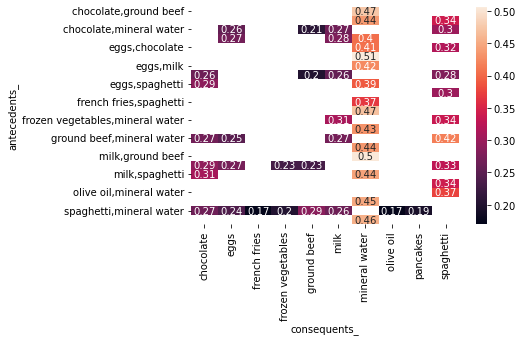

In [15]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'confidence')

sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

The Heatmap shows which items can be placed together to increase the sales. The itemsets show the the set of items which means there is a posibility that if customer buys one item he/she can buy another item too.

### 10. Find the association rules among the items/group of items that have support greater than the min support. Use metric as &quot;confidence&quot; and min_threshold=0.2, and display the results sorted by lift.

In [16]:
frequent_itemsets1 = apriori(onehot,min_support=0.03,use_colnames = True)
rules1=association_rules(frequent_itemsets1,metric='confidence',min_threshold=0.2).sort_values('lift',ascending=True).reset_index(drop=True)

In [17]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(green tea),(mineral water),0.132000,0.238267,0.030933,0.234343,0.983534,-0.000518,0.994876
1,(chocolate),(eggs),0.163867,0.179733,0.033200,0.202604,1.127246,0.003748,1.028681
2,(spaghetti),(eggs),0.174133,0.179733,0.036533,0.209801,1.167290,0.005236,1.038051
3,(eggs),(spaghetti),0.179733,0.174133,0.036533,0.203264,1.167290,0.005236,1.036563
4,(french fries),(eggs),0.170933,0.179733,0.036400,0.212949,1.184803,0.005678,1.042202


### 11. Find the various products that must be placed together to maximize the profit for the dataset specified.

In [18]:
a=list(rules1['antecedents'])
c=list(rules1['consequents'])
s=list(rules1['support'])
co=list(rules1['confidence'])
print("LHS       --->       RHS       [support , confidence]")
print()
for i in range(len(a)):
    x, *_ = a[i]
    y, *_ = c[i]
    print(str(x)+" ---> "+str(y)+"   ["+str(int(s[i]*100))+" , "+str(int(co[i]*100))+"]")
    print()

LHS       --->       RHS       [support , confidence]

green tea ---> mineral water   [3 , 23]

chocolate ---> eggs   [3 , 20]

spaghetti ---> eggs   [3 , 20]

eggs ---> spaghetti   [3 , 20]

french fries ---> eggs   [3 , 21]

eggs ---> french fries   [3 , 20]

eggs ---> mineral water   [5 , 28]

mineral water ---> eggs   [5 , 21]

french fries ---> chocolate   [3 , 20]

chocolate ---> french fries   [3 , 20]

milk ---> eggs   [3 , 23]

chocolate ---> mineral water   [5 , 32]

mineral water ---> chocolate   [5 , 22]

chocolate ---> spaghetti   [3 , 23]

spaghetti ---> chocolate   [3 , 22]

mineral water ---> spaghetti   [5 , 25]

spaghetti ---> mineral water   [5 , 34]

pancakes ---> mineral water   [3 , 35]

milk ---> chocolate   [3 , 24]

milk ---> mineral water   [4 , 37]

mineral water ---> milk   [4 , 20]

spaghetti ---> milk   [3 , 20]

milk ---> spaghetti   [3 , 27]

frozen vegetables ---> mineral water   [3 , 37]

ground beef ---> mineral water   [4 , 41]

ground beef ---> spag

### 12. Change the threshold and specify its impact.

In [19]:
frequent_itemsets1 = apriori(onehot,min_support=0.03,use_colnames = True)
rules1=association_rules(frequent_itemsets1,metric='confidence',min_threshold=0.33).sort_values('lift',ascending=True).reset_index(drop=True)

In [20]:
rules1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(spaghetti),(mineral water),0.174133,0.238267,0.059733,0.343032,1.439698,0.018243,1.159468
1,(pancakes),(mineral water),0.095067,0.238267,0.033733,0.354839,1.489250,0.011082,1.180687
2,(milk),(mineral water),0.129600,0.238267,0.048000,0.370370,1.554436,0.017121,1.209812
3,(frozen vegetables),(mineral water),0.095333,0.238267,0.035733,0.374825,1.573133,0.013019,1.218433
4,(ground beef),(mineral water),0.098267,0.238267,0.040933,0.416554,1.748266,0.017520,1.305576


When the threhold is changed the number of rules generated will increase or decrease. If we increase the threshold the number of rules will decrease and if we decrease the threshold then number of rules will increase.

### 13.  Consider some random antecedents and consequents and find if it will be good to place them nearby to increase sales.

In [25]:
import random
l=len(rules1)
a=list(rules1['antecedents'])
c=list(rules1['consequents'])
s=list(rules1['support'])
co=list(rules1['confidence'])
print()
for i in range(len(a)):
    x, *_ = a[random.randint(1,l)-1]
    y, *_ = c[random.randint(1,l)-1]
    print(str(x)+" ---> "+str(y))
    print()


ground beef ---> mineral water

pancakes ---> mineral water

milk ---> spaghetti

pancakes ---> mineral water

spaghetti ---> mineral water

ground beef ---> mineral water



If can be good and it can't be too because there will be formation of large combinations and moreover it might affect the sales of the item too beacause of that. Apriori gives a well defined calculated combination of items which can increase the sales of the item.